In [1]:
# show some images and labels

# import all dependecies form get and show the images


In [2]:
# 1. Take in a Dataset as well as a list of class names
import matplotlib.pyplot as plt
def display_images(images:list):
    
    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, (targ_image, targ_label) in enumerate(images):
        

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, len(images), i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if targ_label:
            title = f"class: {targ_label}"

        plt.title(title)
    

In [13]:
# get five images with it's label from datasets
from GTSRB_Dataset import GTSRB_Dataset as Dataset
from __global__ import *
dataset_train = Dataset(labels_path=LABELS_PATH_TRAIN, imgs_dir=IMGS_PATH_TRAIN)
dataset_test = dataset = Dataset(labels_path=LABELS_PATH_TEST, imgs_dir=IMGS_PATH_TEST)
train_imgs = [dataset_train.__getitem__(index + 150) for index in range(5)]
test_imgs =  [dataset_test.__getitem__(index) for index in range(5)]

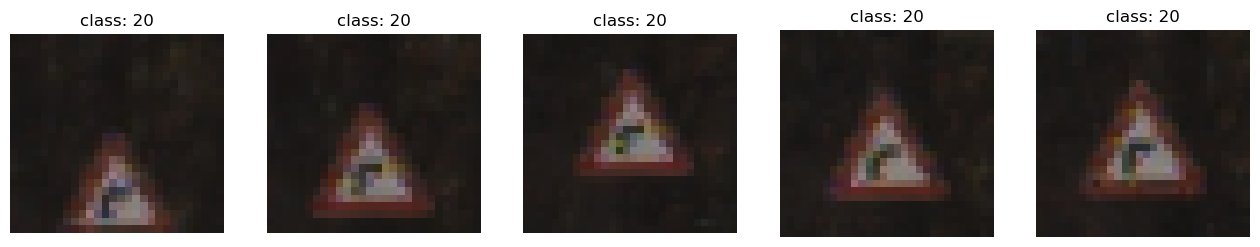

In [14]:
display_images(train_imgs)

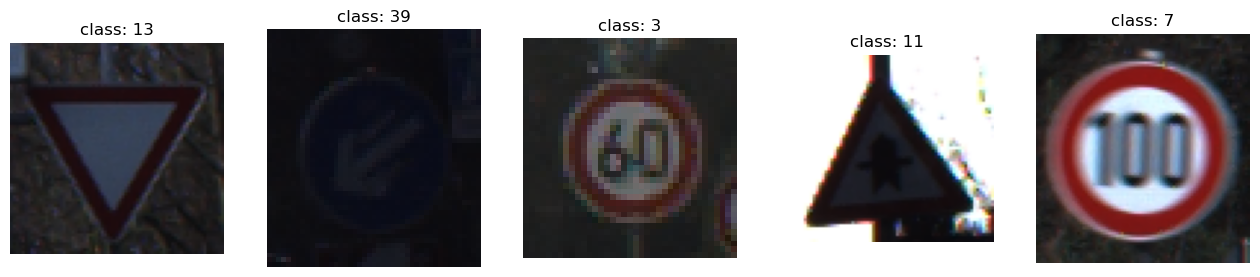

In [ ]:
display_images(test_imgs)

ValueError: Kernel size value should be an odd and positive number.